In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Project/Dataset')
! ls

butterfly-dataset.zip


In [ ]:
! unzip 'butterfly-dataset.zip'

Archive:  butterfly-dataset.zip
  inflating: leedsbutterfly/README.txt  
  inflating: leedsbutterfly/descriptions/001.txt  
  inflating: leedsbutterfly/descriptions/002.txt  
  inflating: leedsbutterfly/descriptions/003.txt  
  inflating: leedsbutterfly/descriptions/004.txt  
  inflating: leedsbutterfly/descriptions/005.txt  
  inflating: leedsbutterfly/descriptions/006.txt  
  inflating: leedsbutterfly/descriptions/007.txt  
  inflating: leedsbutterfly/descriptions/008.txt  
  inflating: leedsbutterfly/descriptions/009.txt  
  inflating: leedsbutterfly/descriptions/010.txt  
  inflating: leedsbutterfly/images/0010001.png  
  inflating: leedsbutterfly/images/0010002.png  
  inflating: leedsbutterfly/images/0010004.png  
  inflating: leedsbutterfly/images/0010005.png  
  inflating: leedsbutterfly/images/0010006.png  
  inflating: leedsbutterfly/images/0010007.png  
  inflating: leedsbutterfly/images/0010008.png  
  inflating: leedsbutterfly/images/0010009.png  
  inflating: leedsbutterf

In [ ]:
from pandas import DataFrame
Categories_Dictionary={'001': 'Danaus_plexippus','002': 'Heliconius_charitonius',
'003': 'Heliconius_erato','004': 'Junonia_coenia','005': 'Lycaena_phlaeas',
'006': 'Nymphalis_antiopa','007': 'Papilio_cresphontes','008': 'Pieris_rapae',
'009': 'Vanessa_atalanta','010': 'Vanessa_cardui'}
Categories = []
Filenames = os.listdir('/content/drive/My Drive/Project/Dataset/leedsbutterfly/images/')
for Filename in Filenames:
        Category = Filename.split(".")[0]
        Categories.append(Categories_Dictionary[Category[0:3]])
DF=DataFrame({'Filename':Filenames,'Category':Categories})
DF.head(5)

,Filename,Category
0,0010001.png,Danaus_plexippus
1,0010002.png,Danaus_plexippus
2,0010004.png,Danaus_plexippus
3,0010005.png,Danaus_plexippus
4,0010006.png,Danaus_plexippus


In [ ]:
os.chdir('/content/drive/My Drive/Project/')
if os.path.exists('NewDataset'):
  ! rm -r NewDataset
os.makedirs('NewDataset')

In [ ]:
os.chdir('/content/drive/My Drive/Project/NewDataset')
Directories=('train','valid','test')
for i in Directories:
  os.makedirs(i)

In [ ]:
Unique_Categories=DF['Category'].unique()

In [ ]:
for i in Directories:
  os.chdir('/content/drive/My Drive/Project/NewDataset/'+i)
  for j in Unique_Categories:
    os.mkdir(j)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train , y_test = train_test_split(DF['Filename'] , DF['Category'] ,test_size = 0.2)


In [ ]:
import shutil
for i in range(len(X_train)):
  Source='/content/drive/My Drive/Project/Dataset/leedsbutterfly/images/'+X_train.iloc[i]
  Destination='/content/drive/My Drive/Project/NewDataset/train/'+Y_train.iloc[i]+'/'+X_train.iloc[i]
  print('Processing image: ',i+1,'/',len(X_train))
  shutil.copy(Source,Destination)

Processing image:  1 / 665
Processing image:  2 / 665
Processing image:  3 / 665
Processing image:  4 / 665
Processing image:  5 / 665
Processing image:  6 / 665
Processing image:  7 / 665
Processing image:  8 / 665
Processing image:  9 / 665
Processing image:  10 / 665
Processing image:  11 / 665
Processing image:  12 / 665
Processing image:  13 / 665
Processing image:  14 / 665
Processing image:  15 / 665
Processing image:  16 / 665
Processing image:  17 / 665
Processing image:  18 / 665
Processing image:  19 / 665
Processing image:  20 / 665
Processing image:  21 / 665
Processing image:  22 / 665
Processing image:  23 / 665
Processing image:  24 / 665
Processing image:  25 / 665
Processing image:  26 / 665
Processing image:  27 / 665
Processing image:  28 / 665
Processing image:  29 / 665
Processing image:  30 / 665
Processing image:  31 / 665
Processing image:  32 / 665
Processing image:  33 / 665
Processing image:  34 / 665
Processing image:  35 / 665
Processing image:  36 / 665
P

In [ ]:
X_valid , x_test , Y_valid , y_test = train_test_split(x_test, y_test,test_size = 0.1)
print('Size of Validation set = ',len(X_valid))
print('Size of Test set = ',len(x_test))

Size of Validation set =  150
Size of Test set =  17


In [ ]:
for i in range(len(X_valid)):
  Source='/content/drive/My Drive/Project/Dataset/leedsbutterfly/images/'+X_valid.iloc[i]
  Destination='/content/drive/My Drive/Project/NewDataset/valid/'+Y_valid.iloc[i]+'/'+X_valid.iloc[i]
  print('Processing image: ',i+1,'/',len(X_valid))
  shutil.copy(Source,Destination)

Processing image:  1 / 150
Processing image:  2 / 150
Processing image:  3 / 150
Processing image:  4 / 150
Processing image:  5 / 150
Processing image:  6 / 150
Processing image:  7 / 150
Processing image:  8 / 150
Processing image:  9 / 150
Processing image:  10 / 150
Processing image:  11 / 150
Processing image:  12 / 150
Processing image:  13 / 150
Processing image:  14 / 150
Processing image:  15 / 150
Processing image:  16 / 150
Processing image:  17 / 150
Processing image:  18 / 150
Processing image:  19 / 150
Processing image:  20 / 150
Processing image:  21 / 150
Processing image:  22 / 150
Processing image:  23 / 150
Processing image:  24 / 150
Processing image:  25 / 150
Processing image:  26 / 150
Processing image:  27 / 150
Processing image:  28 / 150
Processing image:  29 / 150
Processing image:  30 / 150
Processing image:  31 / 150
Processing image:  32 / 150
Processing image:  33 / 150
Processing image:  34 / 150
Processing image:  35 / 150
Processing image:  36 / 150
P

In [ ]:
for i in range(len(x_test)):
  Source='/content/drive/My Drive/Project/Dataset/leedsbutterfly/images/'+x_test.iloc[i]
  Destination='/content/drive/My Drive/Project/NewDataset/test/'+y_test.iloc[i]+'/'+x_test.iloc[i]
  print('Processing image: ',i+1,'/',len(x_test))
  shutil.copy(Source,Destination)

Processing image:  1 / 17
Processing image:  2 / 17
Processing image:  3 / 17
Processing image:  4 / 17
Processing image:  5 / 17
Processing image:  6 / 17
Processing image:  7 / 17
Processing image:  8 / 17
Processing image:  9 / 17
Processing image:  10 / 17
Processing image:  11 / 17
Processing image:  12 / 17
Processing image:  13 / 17
Processing image:  14 / 17
Processing image:  15 / 17
Processing image:  16 / 17
Processing image:  17 / 17


In [ ]:
import tensorflow as tf
Device_Name=tf.test.gpu_device_name()
if Device_Name!='/device:GPU:0':
  raise SystemError('GPU device not found')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten,Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001,decay=1e-6),
              metrics=['accuracy','mae','mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
Batch_Size_Train=5
Batch_Size_Valid=2

In [ ]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

665


In [ ]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

150


In [ ]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

133
75


In [ ]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 665 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [ ]:
model.fit_generator(Train_Data,steps_per_epoch=Steps_Per_Epoch_Train,epochs=120,
                    validation_data=Valid_Data,validation_steps=Steps_Per_Epoch_Valid)

Epoch 1/120
133/133 [==============================] - 848s 6s/step - loss: 2.2952 - accuracy: 0.1188 - mae: 0.1797 - mse: 0.0899 - val_loss: 2.4066 - val_accuracy: 0.1000 - val_mae: 0.1797 - val_mse: 0.0898
Epoch 2/120
133/133 [==============================] - 17s 126ms/step - loss: 2.2742 - accuracy: 0.1474 - mae: 0.1791 - mse: 0.0894 - val_loss: 2.1834 - val_accuracy: 0.1867 - val_mae: 0.1783 - val_mse: 0.0886
Epoch 3/120
133/133 [==============================] - 17s 125ms/step - loss: 2.2259 - accuracy: 0.1654 - mae: 0.1777 - mse: 0.0884 - val_loss: 2.1892 - val_accuracy: 0.2067 - val_mae: 0.1743 - val_mse: 0.0859
Epoch 4/120
133/133 [==============================] - 16s 118ms/step - loss: 2.1252 - accuracy: 0.1985 - mae: 0.1736 - mse: 0.0863 - val_loss: 1.8256 - val_accuracy: 0.1933 - val_mae: 0.1677 - val_mse: 0.0841
Epoch 5/120
133/133 [==============================] - 17s 127ms/step - loss: 2.0450 - accuracy: 0.2391 - mae: 0.1698 - mse: 0.0844 - val_loss: 2.2036 - val_accur

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

17


In [ ]:
Batch_Size_Test=Test_Size

In [ ]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

In [ ]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 17 images belonging to 10 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Categories=('Danaus_plexippus','Heliconius_charitonius','Heliconius_erato','Junonia_coenia',
            'Lycaena_phlaeas','Nymphalis_antiopa','Papilio_cresphontes','Pieris_rapae',
            'Vanessa_atalanta','Vanessa_cardui')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Label_Encoding=LabelEncoder().fit_transform(Categories).reshape(-1,1)
One_Hot_Encoding=OneHotEncoder().fit_transform(Label_Encoding).toarray()
Categories_Dictionary={tuple(One_Hot_Encoding[i]):Categories[i] for i in range(len(Categories))}
print(Categories_Dictionary)

{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Danaus_plexippus', (0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Heliconius_charitonius', (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Heliconius_erato', (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Junonia_coenia', (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Lycaena_phlaeas', (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0): 'Nymphalis_antiopa', (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0): 'Papilio_cresphontes', (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0): 'Pieris_rapae', (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0): 'Vanessa_atalanta', (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0): 'Vanessa_cardui'}


In [ ]:
Test_Images,Test_Labels=next(Test_Data)

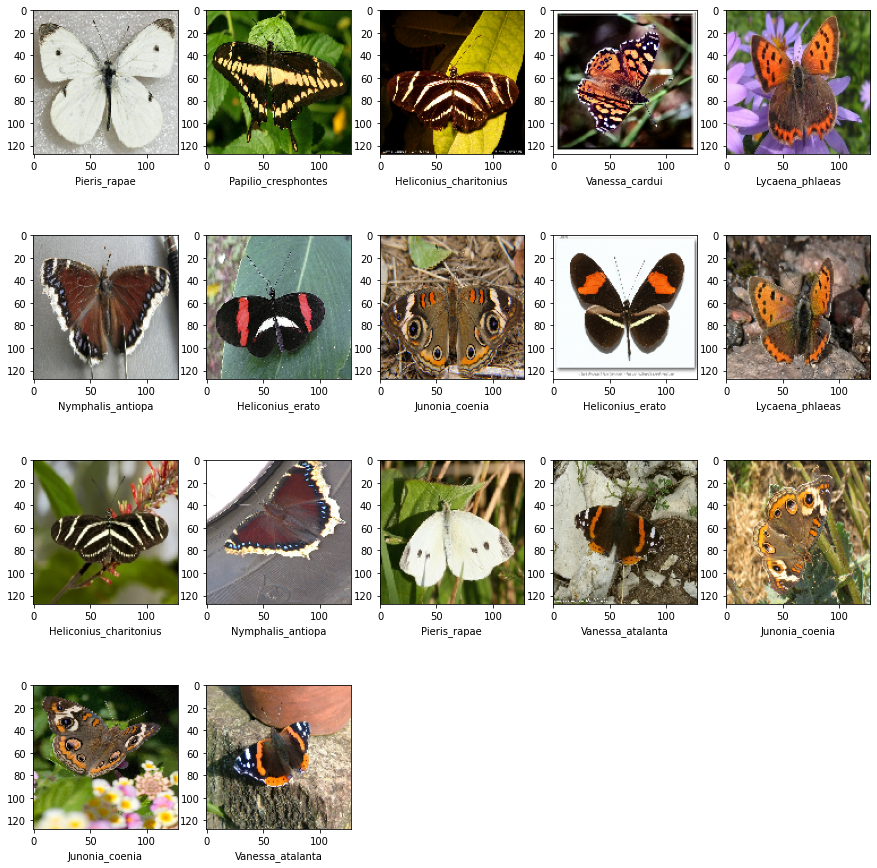

In [ ]:
Original=[]
plt.figure(figsize=(15,20))
for i in range(len(Test_Images)):
  plt.subplot(5,5,i+1)
  plt.imshow(Test_Images[i])
  Original.append(Categories_Dictionary[tuple(Test_Labels[i])])
  plt.xlabel(Original[i])
plt.show()

In [ ]:
Predictions=model.predict_generator(Test_Data,steps=Steps_Per_Epoch_Test,verbose=1)

1/1 [==============================] - 0s 379ms/step


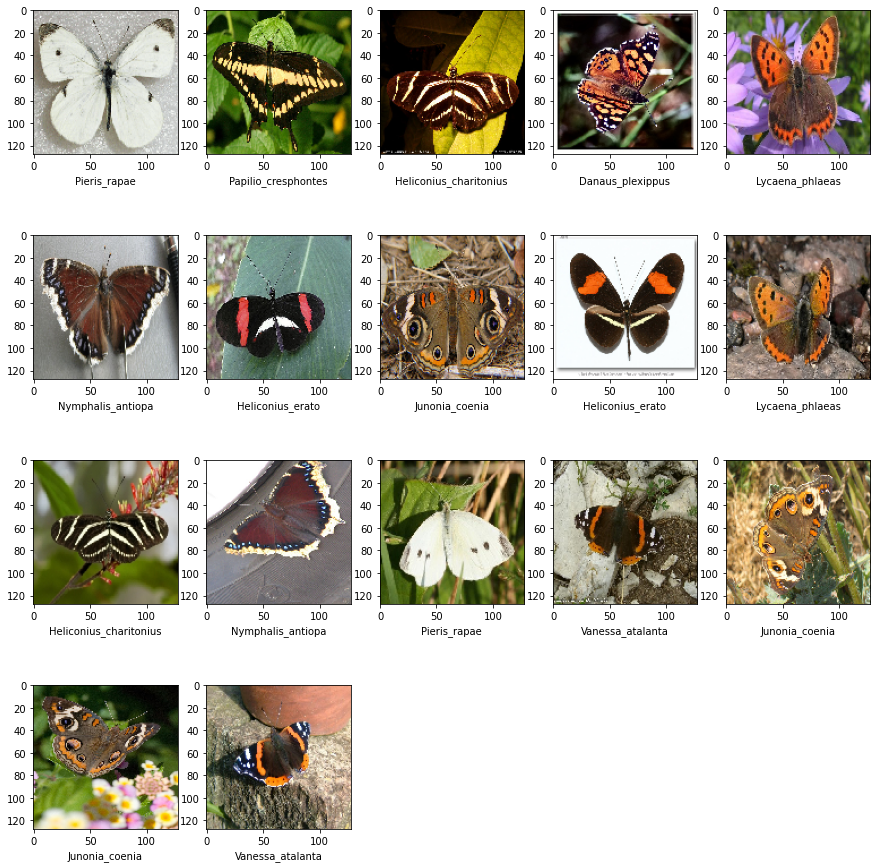

In [ ]:
Predicted=[]
plt.figure(figsize=(15,20))
for i in range(len(Predictions)):
  Predictions[i]=(Predictions[i]>=0.5)
  Predicted.append(Categories_Dictionary[tuple(Predictions[i])])
  plt.subplot(5,5,i+1)
  plt.imshow(Test_Images[i])
  plt.xlabel(Predicted[i])
plt.show()

In [ ]:
Loss,Accuracy,MSE,MAE=model.evaluate(Test_Images,Test_Labels,verbose=1)

17/17 [==============================] - 0s 640us/step


In [ ]:
print('Accuracy: ',Accuracy)
print('Loss: ',Loss)
print('MSE: ',MSE)
print('MAE: ',MAE)

Accuracy:  0.9411764740943909
Loss:  0.8052053451538086
MSE:  0.012556533329188824
MAE:  0.011803581379354


Correctly classified image:  1
Correctly classified image:  2
Correctly classified image:  3
Wrongly classified Vanessa_cardui as Danaus_plexippus
Correctly classified image:  5
Correctly classified image:  6
Correctly classified image:  7
Correctly classified image:  8
Correctly classified image:  9
Correctly classified image:  10
Correctly classified image:  11
Correctly classified image:  12
Correctly classified image:  13
Correctly classified image:  14
Correctly classified image:  15
Correctly classified image:  16
Correctly classified image:  17

Accuracy =  16 / 17  =  94.11764705882352 %


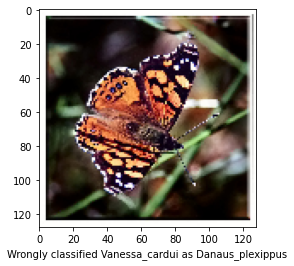

In [ ]:
Accuracy=0
for i in range(len(Original)):
  if Original[i]==Predicted[i]:
    Accuracy+=1
    print("Correctly classified image: ",i+1)
  else:
    print("Wrongly classified "+Original[i]+' as '+Predicted[i])
    plt.figure()
    plt.imshow(Test_Images[i])
    plt.xlabel("Wrongly classified "+Original[i]+' as '+Predicted[i])
print('\nAccuracy = ',Accuracy,'/',len(Predicted),' = ',Accuracy/len(Predicted)*100,'%')
plt.show()